In [4]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import matplotlib

In [5]:
%matplotlib inline

In [6]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show(block=False)
    
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show(block=False)

In [12]:
# Load in example audio
example_audio, example_sr = torchaudio.load("../Small_Dataset/Speaker1/0.flac")
print(example_audio.shape)

torch.Size([1, 185280])


In [13]:
# Resample to 16kHz and ensure 1 channel
example_audio = torchaudio.transforms.Resample(example_sr, 16000)(example_audio).mean(0, keepdim=True)

In [14]:
# How long is the audio in seconds?
print(f"Audio is {example_audio.shape[1] / example_sr} seconds long")

Audio is 11.58 seconds long


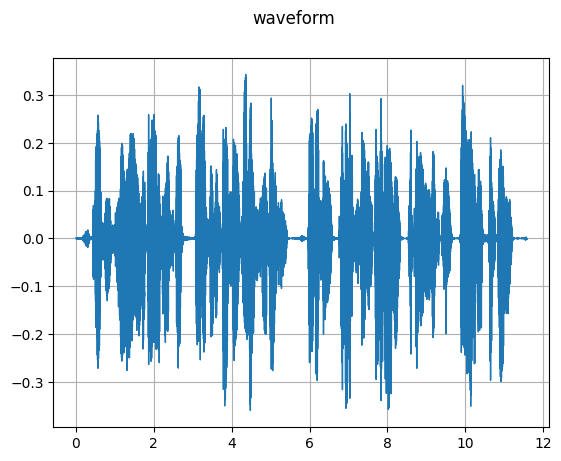

In [15]:
# Plot audio waveform
plot_waveform(example_audio, 16000)

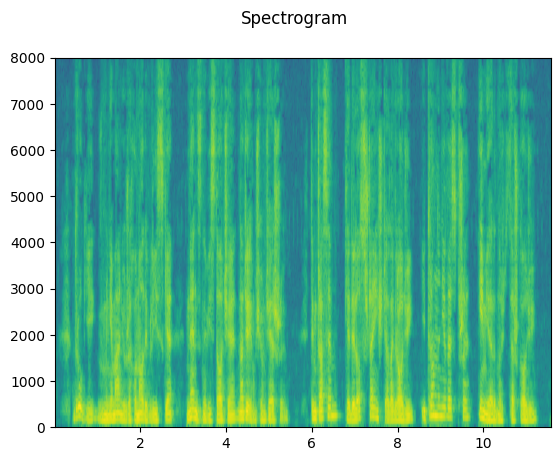

In [16]:
# Plot spectrogram
plot_specgram(example_audio, 16000)